Modelagem de Falha de Equipamento
======

`Conteúdo disponível no livro Bayesian Method for hackers`

___


Nesse notebook vamos desenvolver uma modelagem de falha de um equipamento. OS dados utilizados são de um acidente que ocoreu com propulsores do foguete Shuttle Challenger que explodiram logo após a decolagem. O acidente ocorreu devido a falha em um anel de conexão no propulsor do foguete. Tal falha aconteceu devido a um projeto defeituoso que tornou o anel de conexão inaceitavelmente sensível a vários fatores, incluindo a temperatura externa [1](https://www.jstor.org/stable/2290069#metadata_info_tab_contents). 

A ideia aqui é modelar a probabilidade de falha no anel de conexão do propulsor do foguete de acordo com a temperatura externa.



Temp (F), Falha no Anel de conexão
[[66.  0.]
 [70.  1.]
 [69.  0.]
 [68.  0.]
 [67.  0.]
 [72.  0.]
 [73.  0.]
 [70.  0.]
 [57.  1.]
 [63.  1.]
 [70.  1.]
 [78.  0.]
 [67.  0.]
 [53.  1.]
 [67.  0.]
 [75.  0.]
 [70.  0.]
 [81.  0.]
 [76.  0.]
 [79.  0.]
 [75.  1.]
 [76.  0.]
 [58.  1.]]


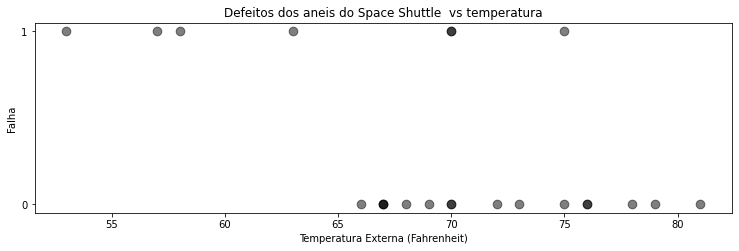

In [6]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

figsize(12.5, 3.5)
np.set_printoptions(precision=3, suppress=True)
challenger_data = np.genfromtxt("data/challenger_data.csv", skip_header=1,
                                usecols=[1, 2], missing_values="NA",
                                delimiter=",")
#drop the NA values
challenger_data = challenger_data[~np.isnan(challenger_data[:, 1])]

#plot it, as a function of tempature (the first column)
print("Temp (F), Falha no Anel de conexão")
print(challenger_data)

plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75, color="k",
            alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("Falha")
plt.xlabel("Temperatura Externa (Fahrenheit)")
plt.title("Defeitos dos aneis do Space Shuttle  vs temperatura");

Olhando para o gráfico acima, podemos ver que a probabilidade de defeito aumenta quando a temperatura externa diminui. Além disso, não podemos apontar no plot um cutoff point  entre temperatura e ocorrência de falha que seja tão nítida. O que vamos modelar é : qual a probabilidade de falha no anel de conexão na temperatura $t$.

Primeiramente, precisamos de uma função para temperatura $p(t)$ que nos dará resultados entre 0 e 1 para modelar a probabilidade e que mude de 1 para 0 com o aumentar da temperatura. Existem muitas funções que poderíamos utilizar, mas vamos utilizar a mais popular: *logistic function.*


$$p(t) = \frac{1}{ 1 + e^{ \;\beta t } } $$

No nosso modelo, $\beta$ é a varipavel que queremos avaliar. Abaixo temos a função de temperatura para  $\beta = 1, 3, -5$.


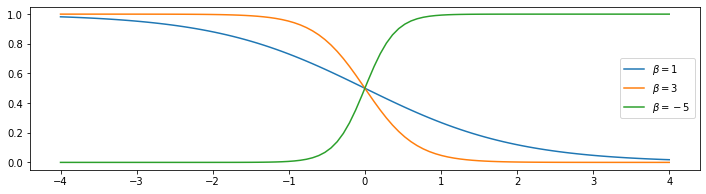

In [57]:
figsize(12, 3)

def logistic(x, beta):
    return 1.0 / (1.0 + np.exp(beta * x))

x = np.linspace(-4, 4, 100)
plt.plot(x, logistic(x, 1), label=r"$\beta = 1$")
plt.plot(x, logistic(x, 3), label=r"$\beta = 3$")
plt.plot(x, logistic(x, -5), label=r"$\beta = -5$")
plt.legend();
